## Dibyendu Das Msc BDA 

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import house_sales_data as hsd

In [18]:
## Sacramento house price data; load
data = hsd.house_sales_data()
price = data["price"]
beds = data["beds"]
area = data["area"]

Text(0, 0.5, 'Price (y)')

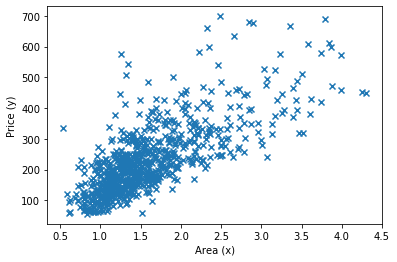

In [16]:
df_house_data = pd.DataFrame({"Area":area, "Price":price,"beds":beds}, columns=["Area", "Price","Beds"])
plt.scatter(df_house_data["Area"], df_house_data["Price"], marker='x')
plt.xlabel("Area (x)")
plt.ylabel("Price (y)")

In [12]:
def gradient_descent_ls(X, y, iters, alpha=1.0):
    m, n = X.shape
    theta = np.zeros(n)
    errs = np.zeros(iters)

    for t in range(iters):
        grad = np.zeros(n)
        for i in range(m):
            yhat = X[i] @ theta
            errs[t] += 1/m * (yhat - y[i])**2
            for j in range(n):
                grad[j] += 1/m * 2 * (yhat - y[i])*X[i,j]
        theta -= alpha * grad
    return theta, errs

In [26]:
# Normalize data 
def normalize_data(X, y, normalize_cols):
    """ Normalize y and specified columns of X in place. """
    min_X = X[:,normalize_cols].min(axis=0)
    max_X = X[:,normalize_cols].max(axis=0)
    min_y = y.min()
    max_y = y.max()
    X[:,normalize_cols] = (X[:,normalize_cols] - min_X) / (max_X - min_X)
    y[:] = (y - min_y) / (max_y - min_y)
    return  min_X, max_X, min_y, max_y
X = np.array([area, beds, np.ones(area.shape[0])]).T
y = price
ranges = normalize_data(X, y, [True, True, False])

In [ ]:
# Implement an evaluation metric for regression
def evaluation_metric(y,y_hat):
    pass

In [29]:
def h(X, theta):
  return X @ theta

In [30]:
def J(theta, X, y):
    return np.mean(np.square(h(X, theta) - y))

In [33]:
J(theta,X,y)

0.014339235247886856

In [24]:
from sklearn.model_selection import train_test_split

In [27]:
# Prepare data this way
X_train = np.hstack((area[:,np.newaxis], beds[:,np.newaxis], np.ones(area.shape[0])[:,np.newaxis]))
y_train = price
min_X, max_X, min_y, max_y = normalize_data(X_train, y_train, [True, True, False])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# call gradient descent and fine-tune your learning rate

In [32]:
theta,cost=gradient_descent_ls(X,y,500,0.1)

In [35]:
theta

array([0.64617435, 0.07955829, 0.05428574])

In [38]:
theta1,cost1=gradient_descent_ls(X,y,500,0.01)

In [39]:
theta1

array([0.20222319, 0.14360878, 0.15383693])

In [59]:
j1=J(theta1,X,y)

In [ ]:
# plot cost vs iterations 
# note gradient descent return costs for all iterations

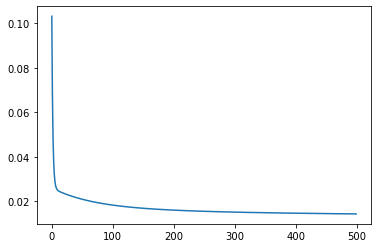

In [34]:
plt.plot(cost)

In [ ]:
# print evaluation metric for test set while 
# changing max_iteration from 500 to 2000
# Note the best value of evaluation metric you get

In [46]:
l=[]
for i in np.arange(500,2001,100):
    theta,cost=gradient_descent_ls(X, y,i, alpha=0.1)
    
    l.append(J(theta,X,y))
    
    

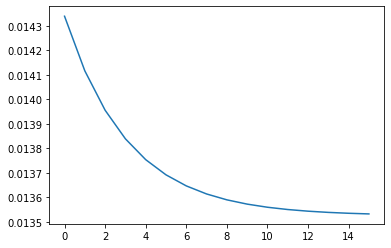

In [47]:
plt.plot(l)

In [ ]:
# compare your solution with scikit-learn library
from sklearn import datasets, linear_model

In [48]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=1)
x_poly=poly.fit_transform(X_train)
poly.fit(X_train,y_train)

PolynomialFeatures(degree=1)

In [49]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_poly,y_train)

LinearRegression()

In [50]:
y_pred=model.predict(poly.fit_transform(X_test))

In [51]:
y_test

array([0.23707771, 0.17382664, 0.29728797, 0.47628415, 0.19357094,
       0.20134001, 0.48485343, 0.11898791, 0.52764078, 0.19046332,
       0.27747686, 0.29450665, 0.2479544 , 0.45310281, 0.17026374,
       0.19357094, 0.21105134, 0.26047503, 0.24592979, 0.2679784 ,
       0.31789775, 0.25261584, 0.52142553, 0.41110479, 0.12598007,
       0.38002853, 0.2959952 , 0.34895226, 0.2712616 , 0.317876  ,
       0.1065574 , 0.26038491, 0.08946546, 0.47683886, 0.15938705,
       0.3799353 , 0.57425518, 0.3644904 , 0.23863153, 0.35672133,
       0.03818962, 0.2750296 , 0.50523169, 0.03042056, 0.61310051,
       0.28369211, 0.3769209 , 0.23241627, 0.26022953, 0.09257308,
       0.41110479, 0.1875033 , 0.43441199, 0.69079117, 0.66593016,
       0.38002853, 0.44373487, 0.07703495, 0.14695655, 0.24329297,
       0.15767164, 0.15006417, 0.17237227, 0.12209553, 0.42819674,
       0.17609054, 0.10811122, 0.176479  , 0.34028976, 0.27903067,
       0.0242053 , 0.62863864, 0.27747686, 0.27825376, 0.27903

In [52]:
y_pred

array([0.33279794, 0.19847744, 0.46143228, 0.28216527, 0.26391927,
       0.13461642, 0.47808176, 0.16222921, 0.56476599, 0.18912636,
       0.25253123, 0.13416027, 0.21603922, 0.36291956, 0.2372502 ,
       0.24318015, 0.21079349, 0.35216861, 0.19461587, 0.25890162,
       0.14784477, 0.40420115, 0.28674249, 0.40006437, 0.23040795,
       0.20851274, 0.43701253, 0.24477667, 0.27305798, 0.25411204,
       0.19368786, 0.26141044, 0.14693247, 0.32619947, 0.17840683,
       0.31820113, 0.25618043, 0.38297445, 0.17110843, 0.24590134,
       0.15444324, 0.41034346, 0.25435583, 0.13736903, 0.47899406,
       0.29837432, 0.3360067 , 0.33576291, 0.26142615, 0.19187897,
       0.20668814, 0.18935443, 0.28423366, 0.35014736, 0.30546035,
       0.42240002, 0.43132637, 0.15537125, 0.13966549, 0.26165423,
       0.15651162, 0.23840628, 0.26802462, 0.17658223, 0.47262367,
       0.1503536 , 0.16268536, 0.18000336, 0.51160879, 0.41446452,
       0.14626396, 0.38732359, 0.32072567, 0.24296779, 0.33188

In [53]:
from sklearn.metrics import mean_squared_error as mse
mse(y_test,y_pred)

0.012602503305118876

In [ ]:
# Create linear regression object

In [ ]:
# Train the model using the training sets

In [ ]:
# Predict on test set and print evaluation metric
# How much does it differ by from 

In [55]:
theta1=model.coef_

In [62]:
j2=J(theta1,X,y)

In [63]:
j1-j2

0.0